In [193]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.neighbors import NearestNeighbors
import cv2
import statistics

In [3]:
from keras.datasets import mnist

Using TensorFlow backend.
/Users/Max/opt/anaconda3/envs/D7041E/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/Max/opt/anaconda3/envs/D7041E/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/Max/opt/anaconda3/envs/D7041E/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/Max/opt

In [213]:
#Function to plot any number in the training data
def plotImg(index, images):
    
    fig, ax = plt.subplots(nrows=1, ncols = 2, figsize=(20,20))
    ax0=plt.subplot(2,2,1)
    ax1=plt.subplot(2,2,2)
    
    ax0.imshow(images[index])

    
    red = images[index][:,:,0]
    green = images[index][:,:,1]
    blue = images[index][:,:,2]
    print(red.shape)
    bins = np.linspace(0, 255, 100)

    n, bins, patches = plt.hist(red.flatten(), bins, color='red', alpha=0.5)
    n, bins, patches = plt.hist(green.flatten(), bins, color='green', alpha=0.5)
    n, bins, patches = plt.hist(blue.flatten(), bins, color='blue', alpha=0.5)

    plt.show()
    plt.close()
    
    #minimum
    r_minimum = min(red.flatten())
    g_minimum = min(green.flatten())
    b_minimum = min(blue.flatten())
    #maximum
    r_maximum = max(red.flatten())
    g_maximum = max(green.flatten())
    b_maximum = max(blue.flatten())
    #std deviation
    r_std = np.std(red.flatten())
    g_std = np.std(green.flatten())
    b_std = np.std(blue.flatten())
    #mean
    r_mean = statistics.mean(red.flatten())
    g_mean = statistics.mean(green.flatten())
    b_mean = statistics.mean(blue.flatten())
    
    
    print("Standard deviation is: \n RED: ", r_std, "\n GREEN: ", g_std, "\n BLUE: ", b_std)
    print("Minimum is: \n RED: ", r_minimum, "\n GREEN: ", g_minimum, "\n BLUE: ", b_minimum)
    print("Maximum is: \n RED: ", r_maximum, "\n GREEN: ", g_maximum, "\n BLUE: ", b_maximum)
    print("Mean is: \n RED: ", r_mean, "\n GREEN: ", g_mean, "\n BLUE: ", b_mean)






(960, 1920)


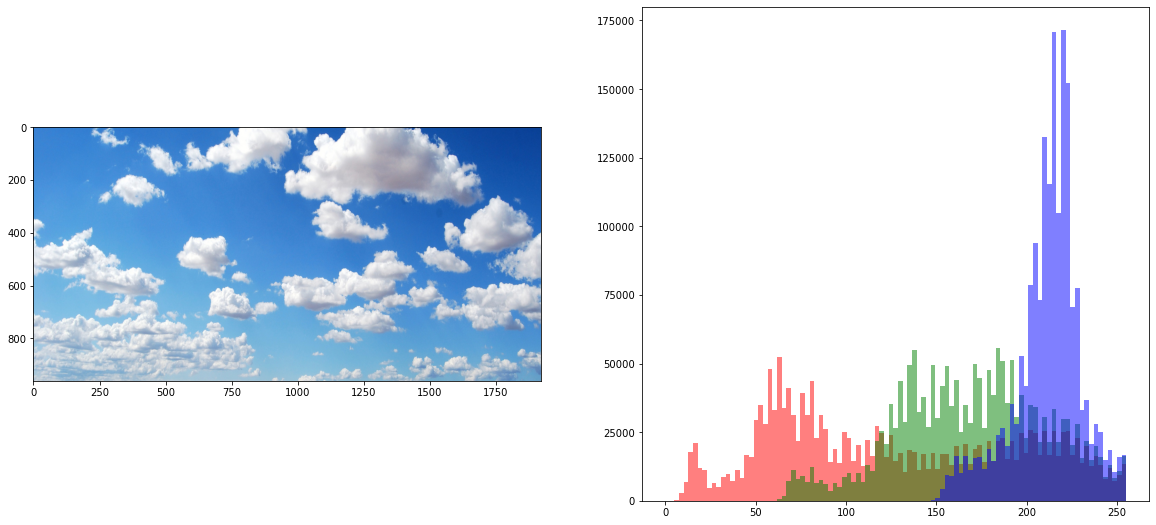

Standard deviation is: 
 RED:  66.4403644999573 
 GREEN:  41.519966833281046 
 BLUE:  18.720426170635783
Minimum is: 
 RED:  0 
 GREEN:  50 
 BLUE:  124
Maximum is: 
 RED:  255 
 GREEN:  255 
 BLUE:  255
Mean is: 
 RED:  127 
 GREEN:  169 
 BLUE:  211


In [214]:
images = []
images.append(cv2.imread('./woods.jpg'))
images.append(cv2.imread('./city.jpeg'))
images.append(cv2.imread('./house.jpg'))    
images.append(cv2.imread('./bike.jpeg'))
images.append(cv2.imread('./sky.jpg'))

for i in range(0,len(images)):
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    

plotImg(4,images)


In [192]:
(Xtr, Ltr), (X_test, L_test)=mnist.load_data()

In [53]:

Xtr.shape


(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

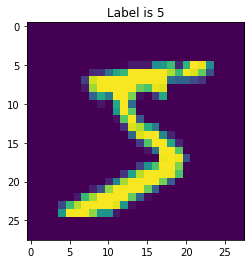

In [9]:
Image=Xtr[0,:,:]
Label=Ltr[0]


plt.title('Label is {Label}'.format(Label=Label))
plt.imshow(Image)

plt.show()
plt.close()


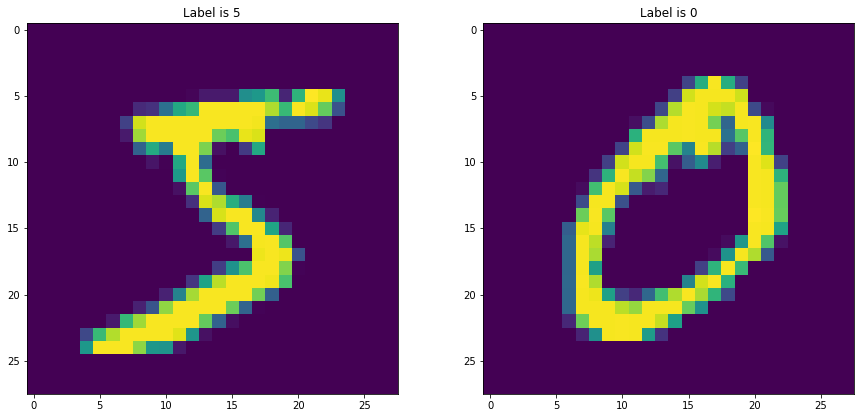

In [10]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,15))
ax0=plt.subplot(2,2,1)
ax1=plt.subplot(2,2,2)

Image=Xtr[0,:,:]
Label=Ltr[0]
Image1=Xtr[1,:,:]
Label1=Ltr[1]


ax0.set_title('Label is {Label}'.format(Label=Label))
ax0.imshow(Image)
ax1.set_title('Label is {Label}'.format(Label=Label1))
ax1.imshow(Image1)


plt.show()
plt.close()


In [11]:
28*28

784

In [12]:
#Traing phase
num_sample=500
Tr_set=Xtr[:num_sample,:,:]
Ltr_set=Ltr[:num_sample]

#Tr_set=Tr_set.reshape(num_sample,Tr_set.shape[1]*Tr_set.shape[2])

Tr_set=Tr_set.reshape(num_sample,Tr_set.shape[1]*Tr_set.shape[2]).astype(int)
Tr_set.shape

(500, 784)

Good link: https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c
Difference: astype(int)

In [13]:
#L1 Norm accuracy is: 0.811
def predictL1(X):
    num_test=X.shape[0]
    Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)
    
    for i in range(num_test):
        distances=np.sum(np.abs(Tr_set-X[i,:]),axis=1)
        
        min_index= np.argmin(distances)
        Lpred[i]=Ltr_set[min_index]
    return Lpred

In [215]:
Test_images=X_test.reshape(X_test.shape[0],X_test.shape[1]* X_test.shape[2])
#print(Test_images[0,:])
Labels_predicted=predictL1(Test_images)

print("Accuracy:", np.mean(Labels_predicted==L_test))



Accuracy: 0.811


In [15]:
#L2 Norm accuracy 0.8294

def predictL2(X):
    num_test=X.shape[0]
    Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)
    
    for i in range(num_test):
        distances=np.sum(np.square(Tr_set-X[i,:]),axis=1)
        
        min_index= np.argmin(distances)
        Lpred[i]=Ltr_set[min_index]
    return Lpred

In [16]:
Test_images=X_test.reshape(X_test.shape[0],X_test.shape[1]* X_test.shape[2])
Labels_predicted=predictL2(Test_images)

print("Accuracy:", np.mean(Labels_predicted==L_test))




Accuracy: 0.8294


In [31]:
#link: https://www.geeksforgeeks.org/python-find-most-frequent-element-in-a-list/
def most_frequent(List): 
    counter = 0
    num = List[0] 
      
    for i in List: 
        curr_frequency = List.count(i) 
        if(curr_frequency> counter): 
            counter = curr_frequency 
            num = i 
  
    return num 
  

In [43]:
#Closest k-neighbors 
def predictK(X,k):
    num_test=X.shape[0]
    Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)
    
    for i in range(0,num_test):#for i in range(num_test):

        distances=np.sum(np.square(Tr_set-X[i,:]),axis=1)
        nbrs = []
        for j in range(k):
            min_index= np.argmin(distances)
            nbrs.append(Ltr_set[min_index])
            distances = np.delete(distances, min_index)
            #distances.delete(min_index)
          
        Lpred[i]=most_frequent(nbrs)
    return Lpred

In [46]:
Test_images=X_test.reshape(X_test.shape[0],X_test.shape[1]* X_test.shape[2])
Labels_predicted=predictK(Test_images,3)

print("Accuracy:", np.mean(Labels_predicted==L_test))




Accuracy: 0.7937
